# Machine Learning Project
## Spotify

### Data Schema

![title](spotify_schema.png)

In [97]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
original_wd = os.getcwd()

os.chdir("SpotGenTrack/DataSources")

artistsDF = pd.read_csv("spotify_artists.csv", index_col=0)
albumsDF = pd.read_csv("spotify_albums.csv", index_col=0)
tracksDF = pd.read_csv("spotify_tracks.csv", index_col=0)

os.chdir(original_wd)
os.chdir("SpotGenTrack/FeaturesExtracted")

lyricsDF = pd.read_csv("lyrics_features.csv", index_col=0)
lowlevelDF = pd.read_csv("low_level_audio_features.csv", index_col=0)

In [4]:
tracksDF.head()

acousticness                album_id  \
0         0.294  0D3QufeCudpQANOR7luqdr   
1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         0.750  4tKijjmxGClg4JOLAyo2qE   
3         0.763  6FeJF5r8roonnKraJxr4oB   
4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  energy  ...  \
0          1.0     235584.0   0.606  ...   
1          1.0     656960.0   0.308  ...   
2          1.0     492840.0   0.931  ...   
3          1.0     316578.0   0.126  ...   
4          1.0     558880.0   0.942  ...   

                                         preview_url speechiness    tempo  \
0  https://p.scdn.co/mp3-preview/1b05a902da3a251d...      0.0262  115.018   
1  https://p.scdn.co/mp3-preview/d8140736a6131cb5...      0.9220  115.075   
2  https://p.scdn.co/mp3-preview/c8af28fb15185b18...      0.9440   79.565   
3  https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...      0.9380  112.822   
4  https://p.scdn.co/mp3-preview/32be593c0eb82868...      0.9430   81.260   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...   
1             3.0  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...   
2             4.0  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...   
3             3.0  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...   
4             4.0  https://api.spotify.com/v1/tracks/1Vo802A38tPF...   

   track_name_prev track_number                                   uri valence  \
0         track_14          1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V  0.6220   
1          track_3          3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm  0.5890   
2          track_4          4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn  0.0850   
3          track_9          1.0  spotify:track:6aCe9zzoZmCojX7bbgKKtf  0.5330   
4          track_2          2.0  spotify:track:1Vo802A38tPFHmje1h91um  0.0906   

    type  
0  track  
1  track  
2  track  
3  track  
4  track  

[5 rows x 31 columns]

In [5]:
tracksDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101939 entries, 0 to 101938
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101939 non-null  float64
 1   album_id           101939 non-null  object 
 2   analysis_url       101939 non-null  object 
 3   artists_id         101939 non-null  object 
 4   available_markets  101939 non-null  object 
 5   country            101939 non-null  object 
 6   danceability       101939 non-null  float64
 7   disc_number        101939 non-null  float64
 8   duration_ms        101939 non-null  float64
 9   energy             101939 non-null  float64
 10  href               101939 non-null  object 
 11  track_id           101939 non-null  object 
 12  instrumentalness   101939 non-null  float64
 13  key                101939 non-null  float64
 14  liveness           101939 non-null  float64
 15  loudness           101939 non-null  float64
 16  ly

In [7]:
# Original Correlation 
tracksDF.corr().loc["popularity", :]

acousticness       -0.154408
danceability        0.092382
disc_number        -0.047331
duration_ms        -0.169125
energy              0.153979
instrumentalness   -0.041537
key                -0.000641
liveness           -0.059116
loudness            0.239679
mode               -0.010003
popularity          1.000000
speechiness        -0.304212
tempo               0.061869
time_signature      0.121505
track_number       -0.139460
valence             0.034412
Name: popularity, dtype: float64

<Figure size 7200x4800 with 0 Axes>

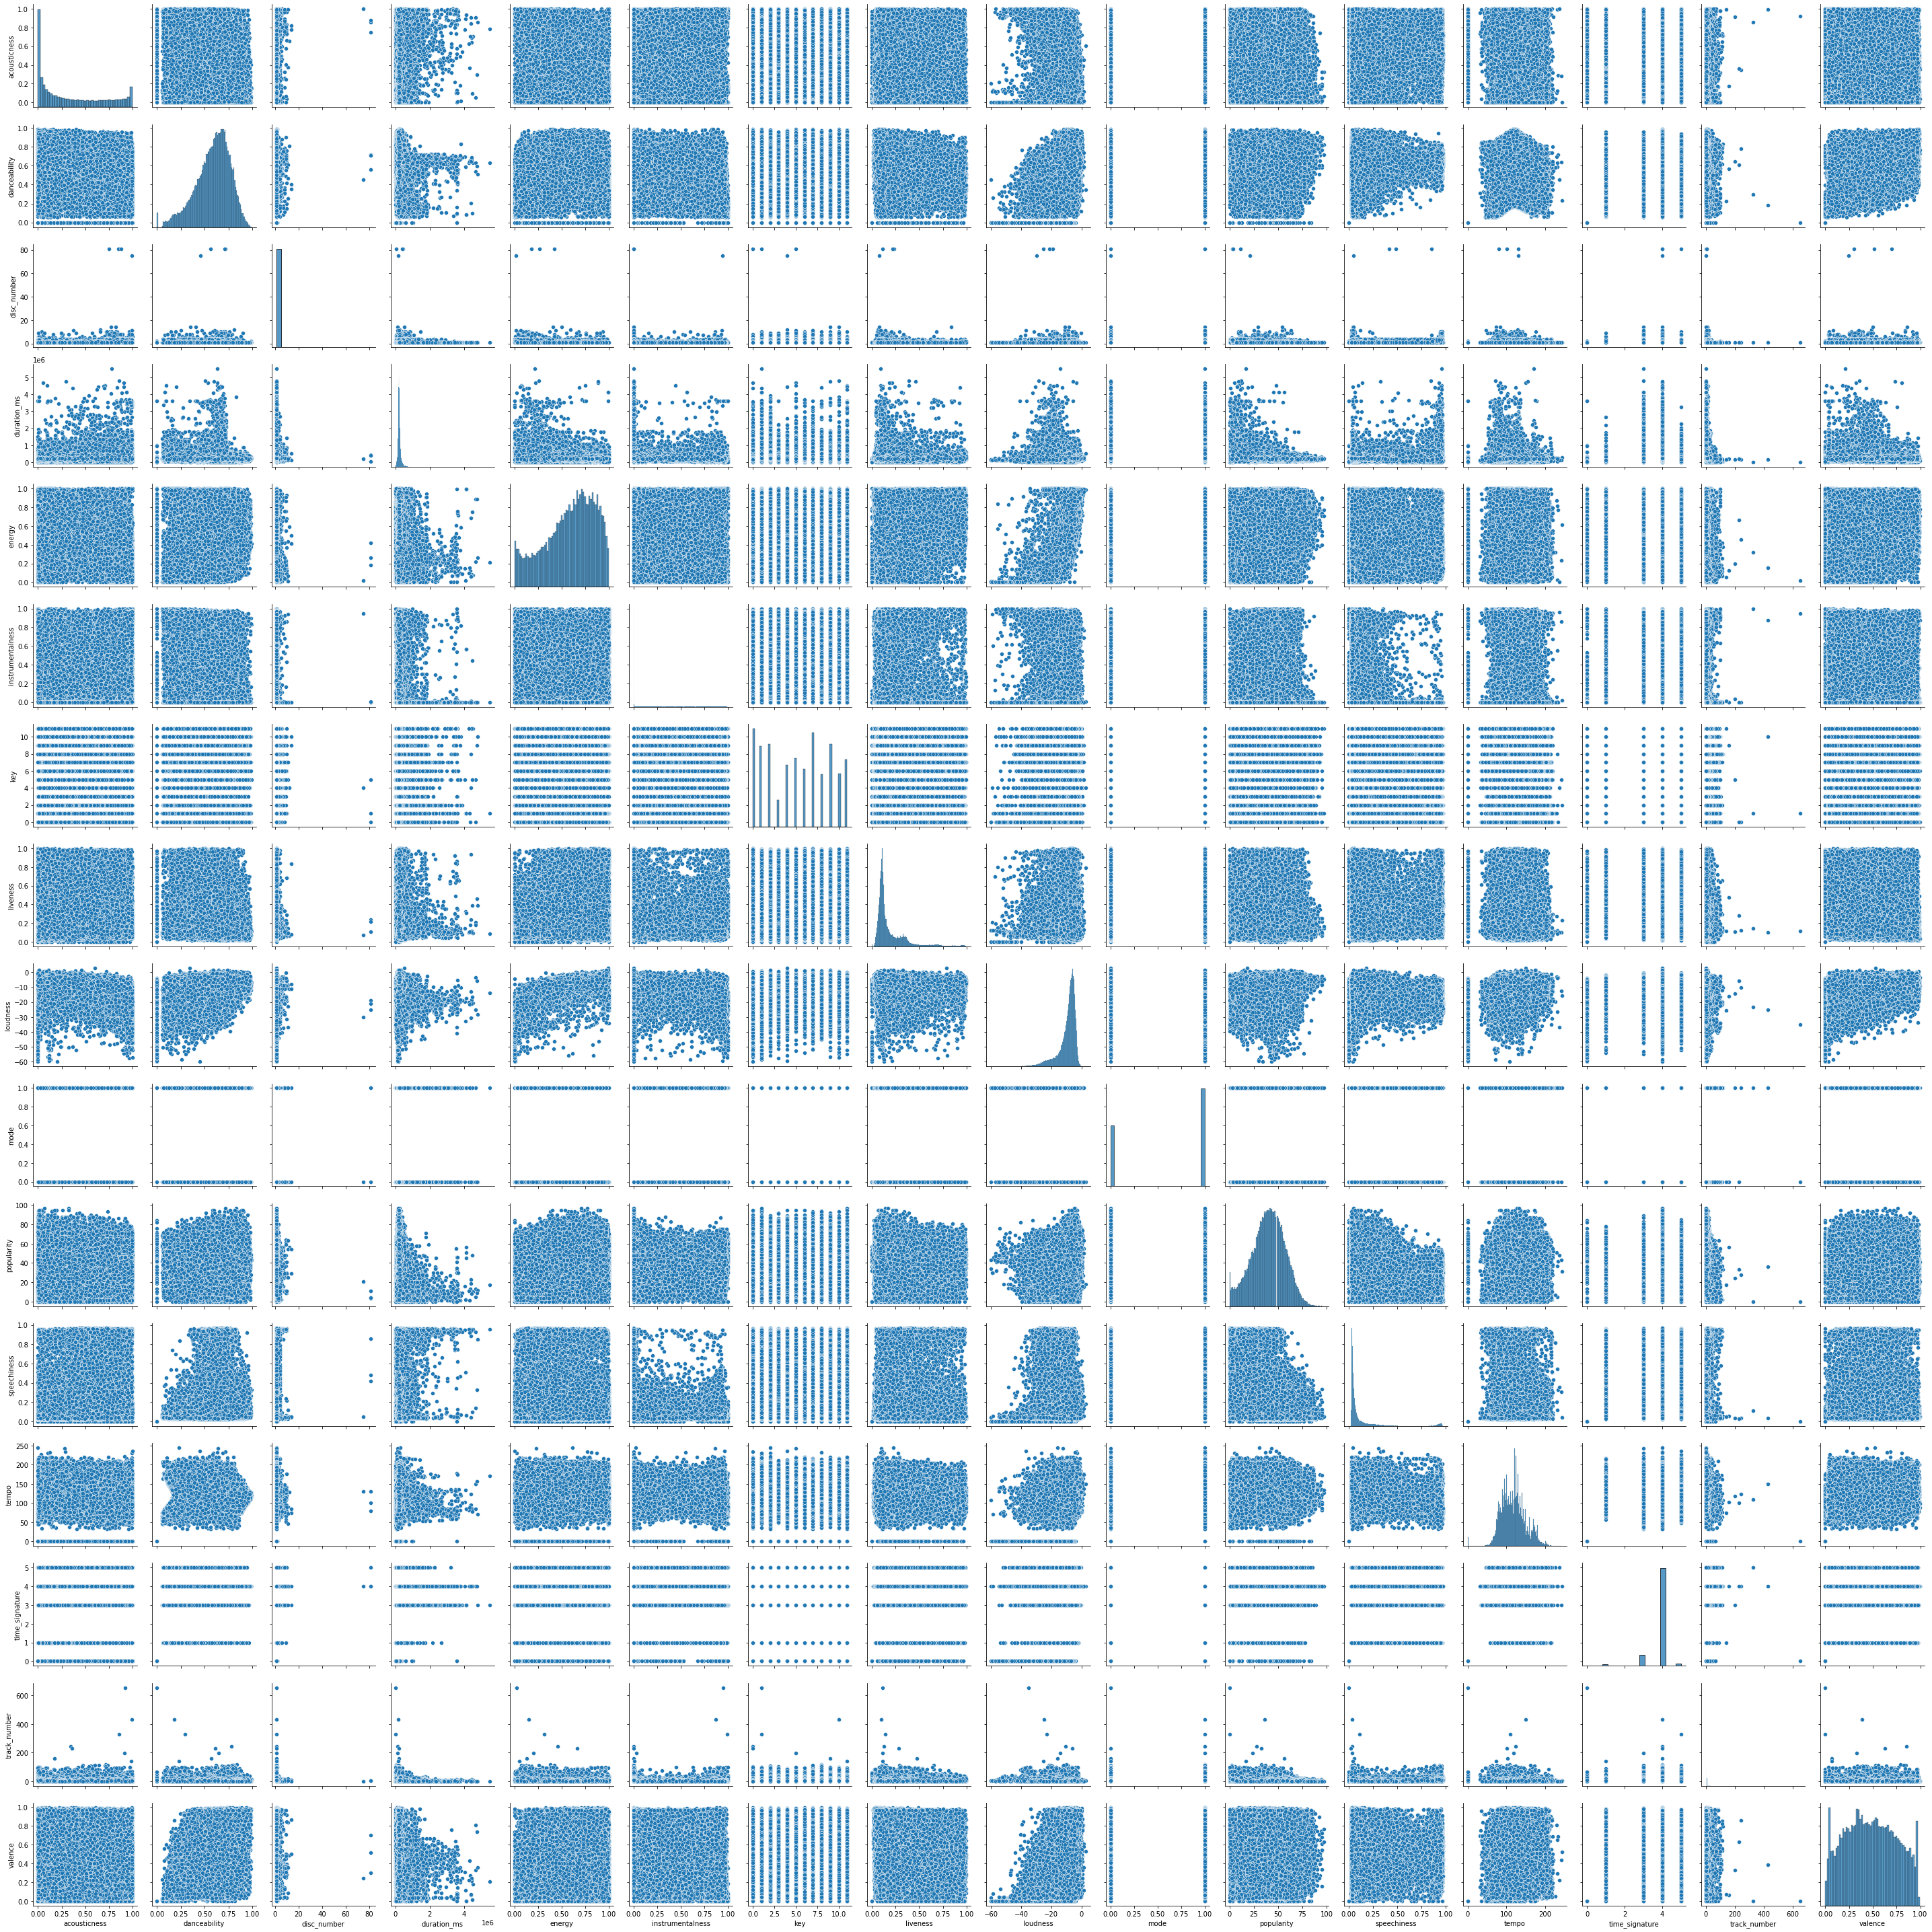

In [10]:
plt.figure(figsize=(12,8), dpi=600)
sns.pairplot(tracksDF)
plt.tight_layout();

In [9]:
tracksDF["popularity"].describe()

count    101939.000000
mean         39.782311
std          16.790769
min           0.000000
25%          29.000000
50%          41.000000
75%          52.000000
max          97.000000
Name: popularity, dtype: float64

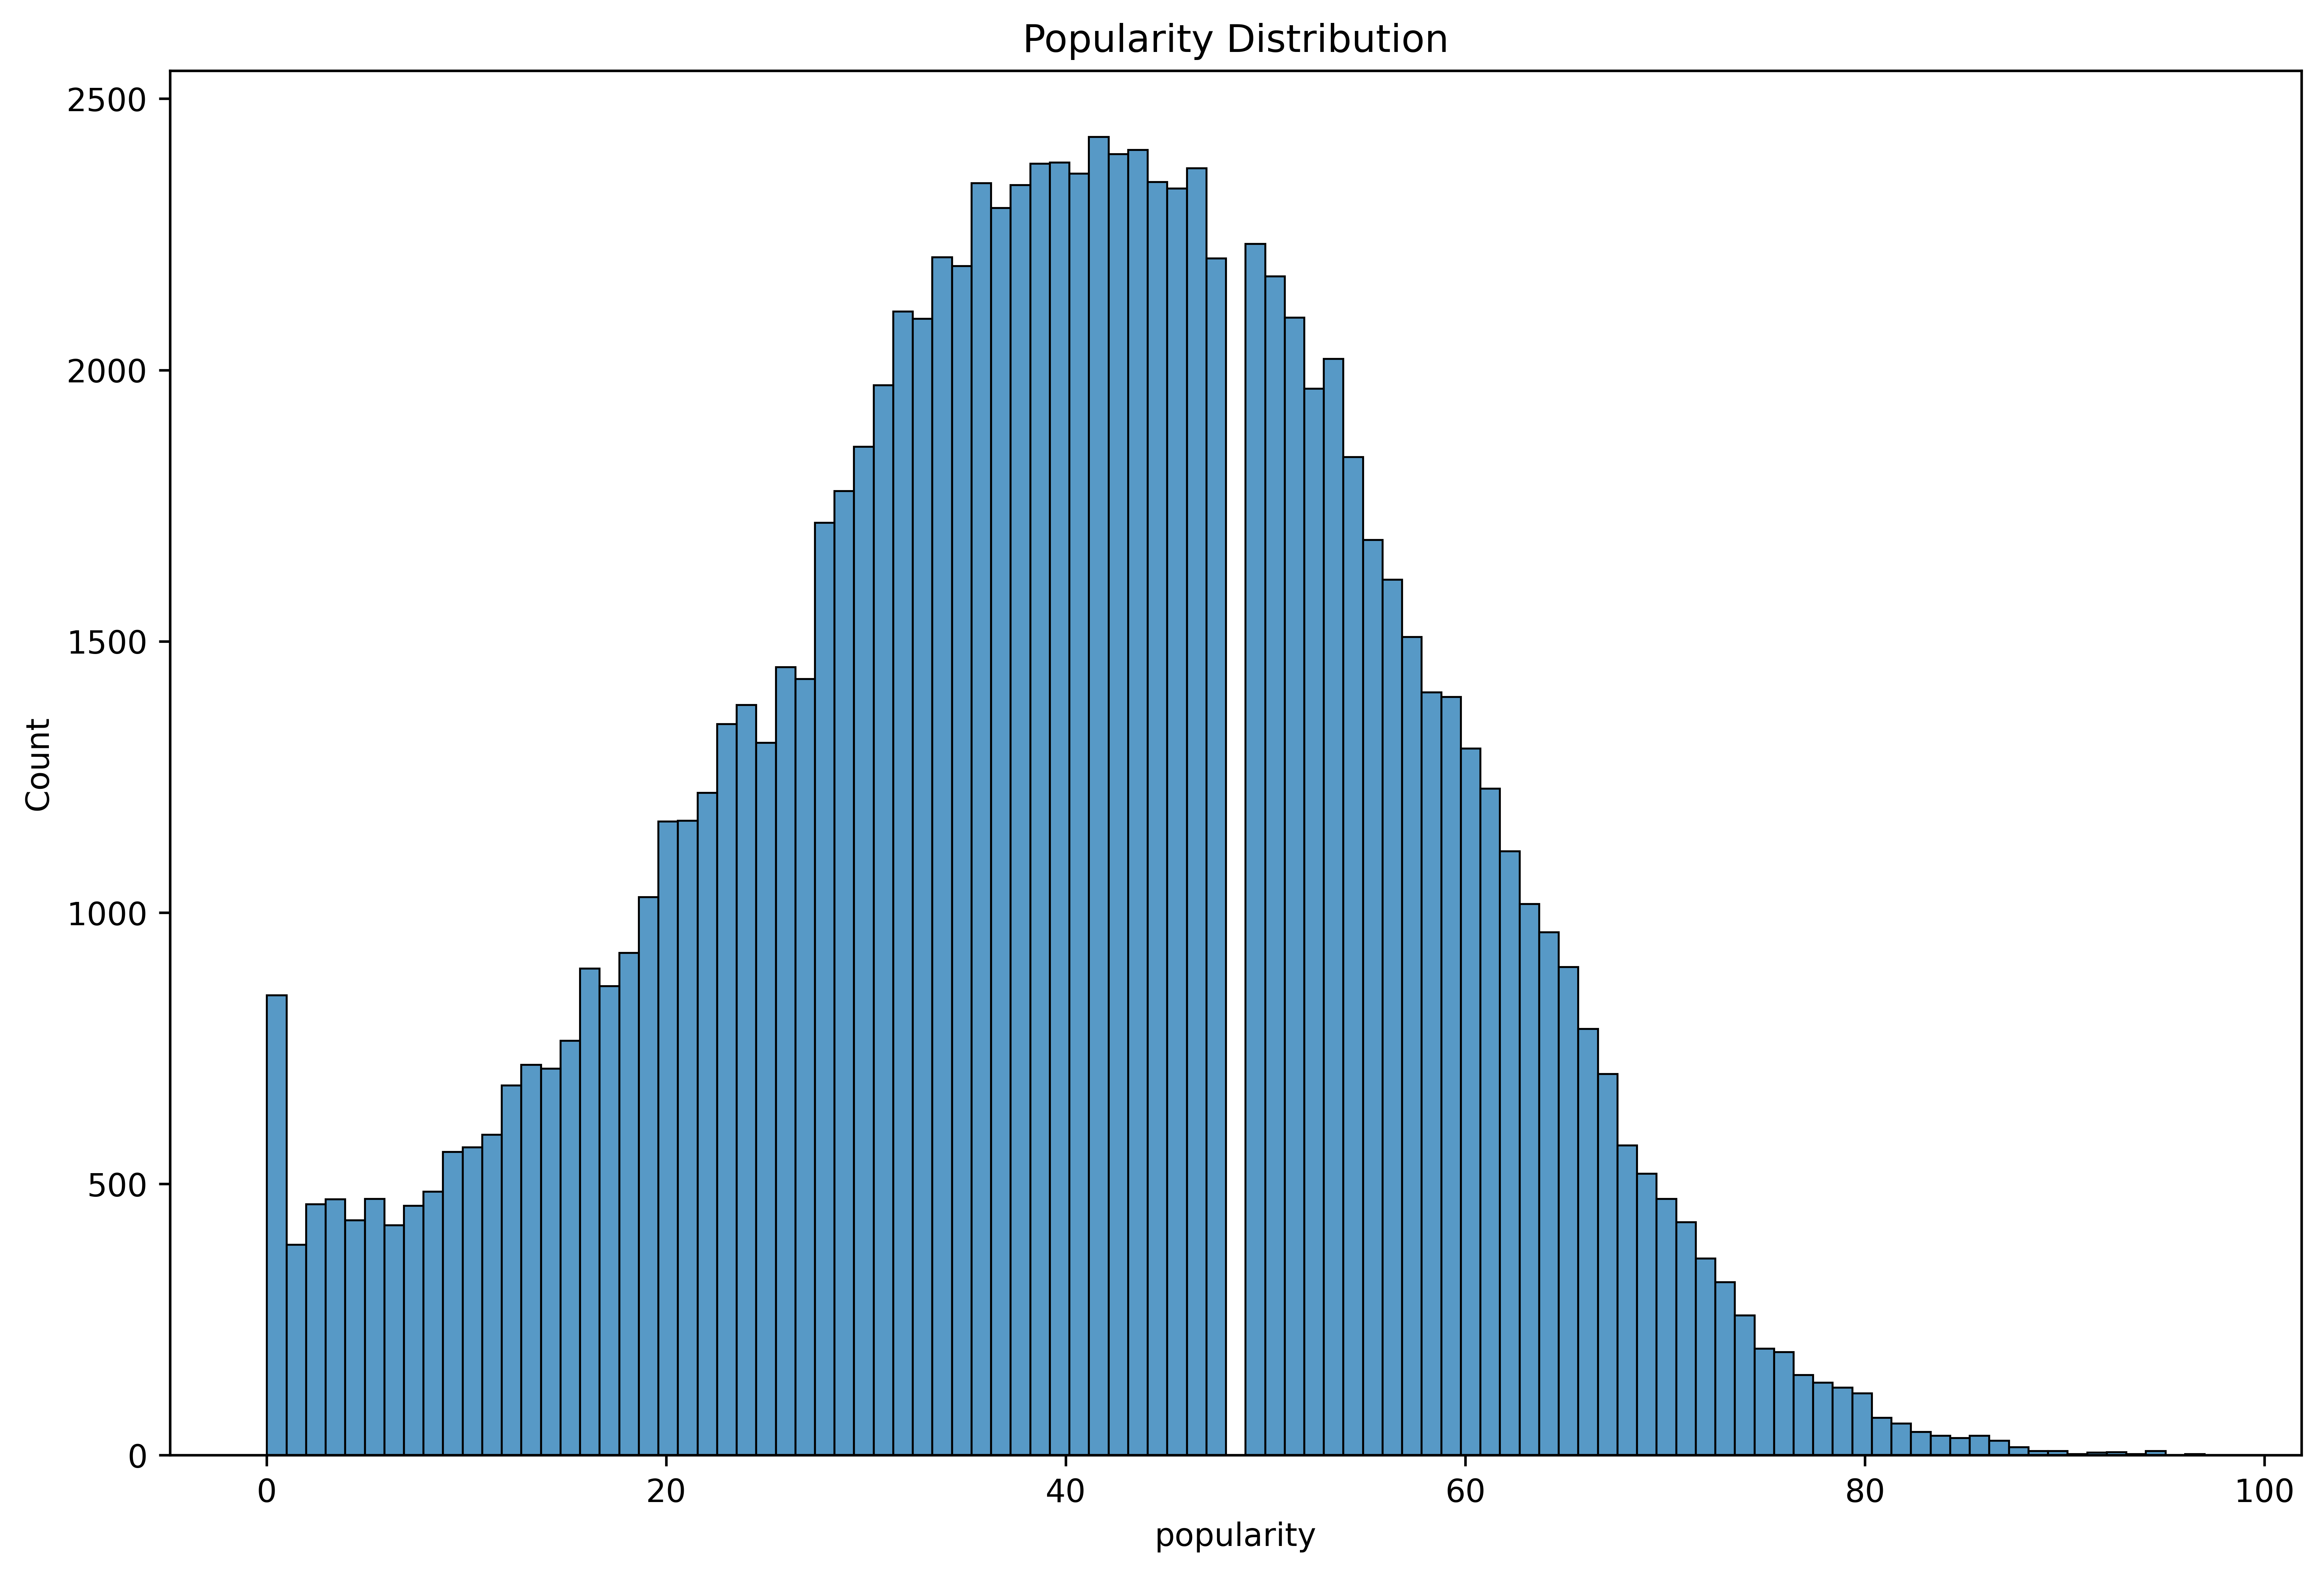

In [11]:
plt.figure(figsize=(12,8), dpi=600)
plt.title('Popularity Distribution')
sns.histplot(tracksDF['popularity']);

In [3]:
# Renaming columns
albumsDF.rename(columns={"name":"track_name", "id":"album_id", "available_markets":"album_available_markets", "release_date":"album_release_date", "total_tracks":"album_total_tracks"}, inplace=True)
artistsDF.rename(columns={"id":"artist_id", "name":"artist_name", "genres":"artist_genres"}, inplace=True)
tracksDF.rename(columns={"id":"track_id"}, inplace=True)

In [12]:
# Other features could be engineered from lyrics in the future, not at the present time
tracksDF.drop(["analysis_url", "href", "preview_url", "track_href", "lyrics"], axis=1, inplace=True)

In [13]:
albumsDF.head()

album_type               artist_id  \
0     single  3DiDSECUqqY1AuBP8qtaIa   
1      album  6s1pCNXcbdtQJlsnM1hRIA   
2     single  5YjfNaHq05WrwldRe1QSBc   
3     single  2G9Vc16JCpnZmK4uGH46Fa   
4     single  2dwM9OcE4c3Ph1UBINSodx   

                             album_available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
2  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
4  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/album/1g...   
1  {'spotify': 'https://open.spotify.com/album/4K...   
2  {'spotify': 'https://open.spotify.com/album/7n...   
3  {'spotify': 'https://open.spotify.com/album/6p...   
4  {'spotify': 'https://open.spotify.com/album/1X...   

                                                href                album_id  \
0  https://api.spotify.com/v1/albums/1gAM7M4rBwEb...  1gAM7M4rBwEbSPeAQR2nx1   
1  https://api.spotify.com/v1/albums/4KfJZV7WfolY...  4KfJZV7WfolYlxBzOTo66s   
2  https://api.spotify.com/v1/albums/7nLYY7uAVUb5...  7nLYY7uAVUb57kpd7tZxnS   
3  https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...  6p20Rt4x2Qn5mUMRi1s6pj   
4  https://api.spotify.com/v1/albums/1XeoOqC1q7U2...  1XeoOqC1q7U2iyLEQJ64cu   

                                              images  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
1  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
2  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
3  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
4  [{'height': 640, 'url': 'https://i.scdn.co/ima...   

                                          track_name album_release_date  \
0                              If I Ain't Got You EP         2019-02-08   
1  Shostakovich Symphony No.5 - Four Romances on ...         2019-03-01   
2                                       Take My Bass         2019-03-14   
3                                Hypnotizing (Are U)         2016-11-16   
4                                           Sunshine         2018-07-20   

  release_date_precision  album_total_tracks                track_id  \
0                    day                   6  2iejTMy9XZ8Gaae0aQ2yl0   
1                    day                   8  1WQfghEjszJJ4H8MAWrQ2C   
2                    day                   1  3jJKj4QTK3v18ZSwpk7AcV   
3                    day                   1  1xGtDafUZbHyYC3Xarcbrj   
4                    day                   1  0gWtsXvXOzAT6FtM3ur8in   

  track_name_prev                                   uri   type  
0        track_32  spotify:album:1gAM7M4rBwEbSPeAQR2nx1  album  
1        track_11  spotify:album:4KfJZV7WfolYlxBzOTo66s  album  
2        track_15  spotify:album:7nLYY7uAVUb57kpd7tZxnS  album  
3        track_46  spotify:album:6p20Rt4x2Qn5mUMRi1s6pj  album  
4        track_10  spotify:album:1XeoOqC1q7U2iyLEQJ64cu  album

In [14]:
albumsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75511 entries, 0 to 75510
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   album_type               75511 non-null  object
 1   artist_id                75511 non-null  object
 2   album_available_markets  75511 non-null  object
 3   external_urls            75511 non-null  object
 4   href                     75511 non-null  object
 5   album_id                 75511 non-null  object
 6   images                   75511 non-null  object
 7   track_name               75511 non-null  object
 8   album_release_date       75511 non-null  object
 9   release_date_precision   75511 non-null  object
 10  album_total_tracks       75511 non-null  int64 
 11  track_id                 75511 non-null  object
 12  track_name_prev          75511 non-null  object
 13  uri                      75511 non-null  object
 14  type                     75511 non-nul

In [16]:
# Adding column with number of available markets
n_available_markets = []
for n in albumsDF["album_available_markets"]:
    n_available_markets.append(len(n[1:-1].replace("'","").replace(" ","").split(",")))
albumsDF["n_available_markets_album"] = n_available_markets

In [18]:
albumsDF_columns = ["album_type", "artist_id", "n_available_markets_album", "album_id", "album_total_tracks", "track_id", "album_release_date"]
albumsDF = albumsDF.loc[:, albumsDF_columns]

In [20]:
artistsDF.head()

artist_popularity  followers  \
0                 44      23230   
1                 22        313   
2                 26       1596   
3                 31        149   
4                 21         11   

                                       artist_genres               artist_id  \
0  ['sertanejo', 'sertanejo pop', 'sertanejo trad...  4mGnpjhqgx4RUdsIJiURdo   
1                                                 []  1dLnVku4VQUOLswwDFvRc9   
2                                ['danish pop rock']  6YVY310fjfUzKi8hiqR7iK   
3                             ['uk alternative pop']  2VElyouiCfoYPDJluzwJwK   
4                                 ['french baroque']  4agVy03qW8juSysCTUOuDI   

           artist_name                track_id track_name_prev    type  
0        Juliano Cezar  0wmDmAILuW9e2aRttkl4aC         track_9  artist  
1       The Grenadines  4wqwj0gA8qPZKLl5WVqXml        track_30  artist  
2              Gangway  1bFqWDbvHmZe2f4Nf9qaD8        track_38  artist  
3                FADES  3MFSUBAidPzRBbIS7BDj1S        track_34  artist  
4  Jean-Pierre Guignon  2r3q57FhxdsCyYr0kuDq4b        track_26  artist

In [21]:
artistsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56129 entries, 0 to 56128
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_popularity  56129 non-null  int64 
 1   followers          56129 non-null  int64 
 2   artist_genres      56129 non-null  object
 3   artist_id          56129 non-null  object
 4   artist_name        56128 non-null  object
 5   track_id           56129 non-null  object
 6   track_name_prev    56129 non-null  object
 7   type               56129 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.9+ MB


In [24]:
artistsDF.drop(["track_id", "track_name_prev", "type"], axis=1, inplace=True)

In [23]:
lyricsDF.head()

mean_syllables_word  mean_words_sentence  n_sentences  n_words  \
0                -1.00                -1.00           -1       -1   
1                 1.10                 5.65           31      326   
2                 1.37                 4.77           74      532   
3                 1.95                 3.38           72      430   
4                 1.16                 2.99           68      368   

   sentence_similarity                track_id  vocabulary_wealth  
0            -1.000000  5KIfHjHI5NIsPHNt58qua0              -1.00  
1             0.043011  13keyz9ikBe6ZpRasw7l4X               0.45  
2             0.050352  1WugzepXsLjnsM0K4UaWYc               0.59  
3             0.028560  2MO6oEAlMKcsfI8xP3yoy8               0.49  
4             0.047849  1i4St7fmSUE9nB3R9n8fol               0.47

In [25]:
lyricsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94954 entries, 0 to 94953
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_syllables_word  94954 non-null  float64
 1   mean_words_sentence  94954 non-null  float64
 2   n_sentences          94954 non-null  int64  
 3   n_words              94954 non-null  int64  
 4   sentence_similarity  94954 non-null  float64
 5   track_id             94954 non-null  object 
 6   vocabulary_wealth    94954 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.8+ MB


In [38]:
# Approach 1
# Tracks with Albums
merge_1 = tracksDF.merge(albumsDF, how="inner", on="album_id")

# With artists
merge_2 = merge_1.merge(artistsDF, how="inner", on="artist_id")

# With lyrics
final_df =  merge_2.merge(lyricsDF, how="inner", left_on="track_id_x", right_on="track_id")

In [39]:
final_df.shape

(94282, 43)

In [40]:
final_df.columns

Index(['acousticness', 'album_id', 'artists_id', 'available_markets',
       'country', 'danceability', 'disc_number', 'duration_ms', 'energy',
       'track_id_x', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'playlist', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type', 'album_type', 'artist_id', 'n_available_markets_album',
       'album_total_tracks', 'track_id_y', 'album_release_date',
       'artist_popularity', 'followers', 'artist_genres', 'artist_name',
       'mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [41]:
to_remove = ["uri", "track_id_y"]

final_df.drop(to_remove, axis=1, inplace=True)
final_df.columns = ['acousticness', 'album_id', 'artists_id', 'available_markets',
       'country', 'danceability', 'disc_number', 'duration_ms', 'energy',
       'track_id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'playlist', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_name_prev', 'track_number', 'valence',
       'type', 'album_type', 'artist_id', 'n_available_markets_album',
       'album_total_tracks', 'album_release_date',
       'artist_popularity', 'followers', 'artist_genres', 'artist_name',
       'mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth']

In [42]:
final_df.shape

(94282, 41)

In [43]:
final_df.isna().sum()

acousticness                 0
album_id                     0
artists_id                   0
available_markets            0
country                      0
danceability                 0
disc_number                  0
duration_ms                  0
energy                       0
track_id                     0
instrumentalness             0
key                          0
liveness                     0
loudness                     0
mode                         0
name                         0
playlist                     0
popularity                   0
speechiness                  0
tempo                        0
time_signature               0
track_name_prev              0
track_number                 0
valence                      0
type                         0
album_type                   0
artist_id                    0
n_available_markets_album    0
album_total_tracks           0
album_release_date           0
artist_popularity            0
followers                    0
artist_g

In [82]:
# Approach 2

finalDF = tracksDF.set_index("track_id").join(albumsDF.set_index("track_id"), lsuffix='_track', rsuffix='_album')
finalDF = finalDF.join(lyricsDF.set_index("track_id"))
finalDF = finalDF.join(lowlevelDF.set_index("track_id"))
finalDF = finalDF.set_index("artist_id").join(artistsDF.set_index("artist_id"), lsuffix='_final', rsuffix='_artist')

In [83]:
finalDF.shape

(101939, 247)

In [84]:
unselected_columns = ['country',
       'track_name_prev_track', 'uri_track', 'type_track',
       'external_urls', 'href_album', 'id', 'images', 'name_album',
       'release_date', 'release_date_precision',
       'track_name_prev_album', 'uri_album',
       'track_name_prev', 'type']

finalDF = finalDF[finalDF.columns.difference(unselected_columns)]

In [85]:
finalDF.shape

(101939, 244)

In [86]:
finalDF.isna().sum()

Chroma_1               30
Chroma_10              30
Chroma_11              30
Chroma_12              30
Chroma_2               30
                     ... 
time_signature          0
track_number            0
uri                     0
valence                 0
vocabulary_wealth    6985
Length: 244, dtype: int64

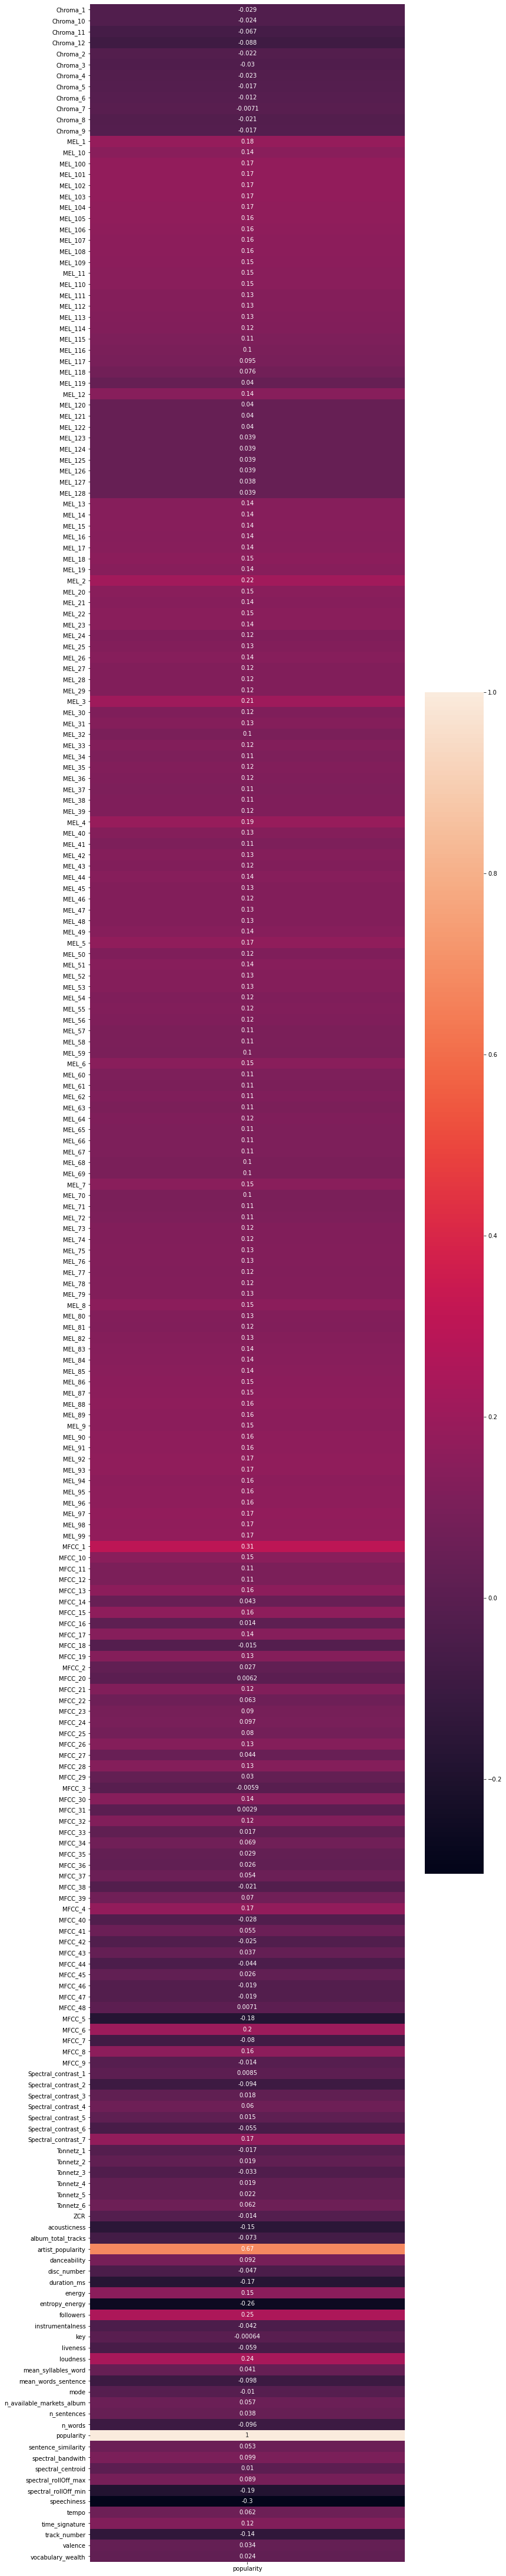

In [87]:
corr = finalDF.corr()
popularity_corr = corr[["popularity"]]

plt.figure(figsize=(12,80))

sns.heatmap(popularity_corr, annot=True)

plt.show()

In [48]:
# For Approach 1

# Excluding Quasi-Constant Features
# Remove feature column where approximately 99% of the values are similar
features_df = final_df.loc[:, final_df.columns != "popularity"]
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(features_df)
quasi_constant_columns = [column for column in features_df.columns
                    if column not in features_df.columns[quasi_constant_filter.get_support()]]

print(f"Quasi-Constant Features: {quasi_constant_columns}")
final_df = final_df[final_df.columns.difference(quasi_constant_columns)]

ValueError: could not convert string to float: '0D3QufeCudpQANOR7luqdr'

In [51]:
# Excluding highly correlated features
features_df_2 = final_df.loc[:, final_df.columns!="popularity"]
correlation_matrix = features_df_2.corr()

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly-correlated Features: {correlated_features}")
final_df = final_df[final_df.columns.difference(correlated_features)]

Highly-correlated Features: {'vocabulary_wealth'}


<AxesSubplot:>

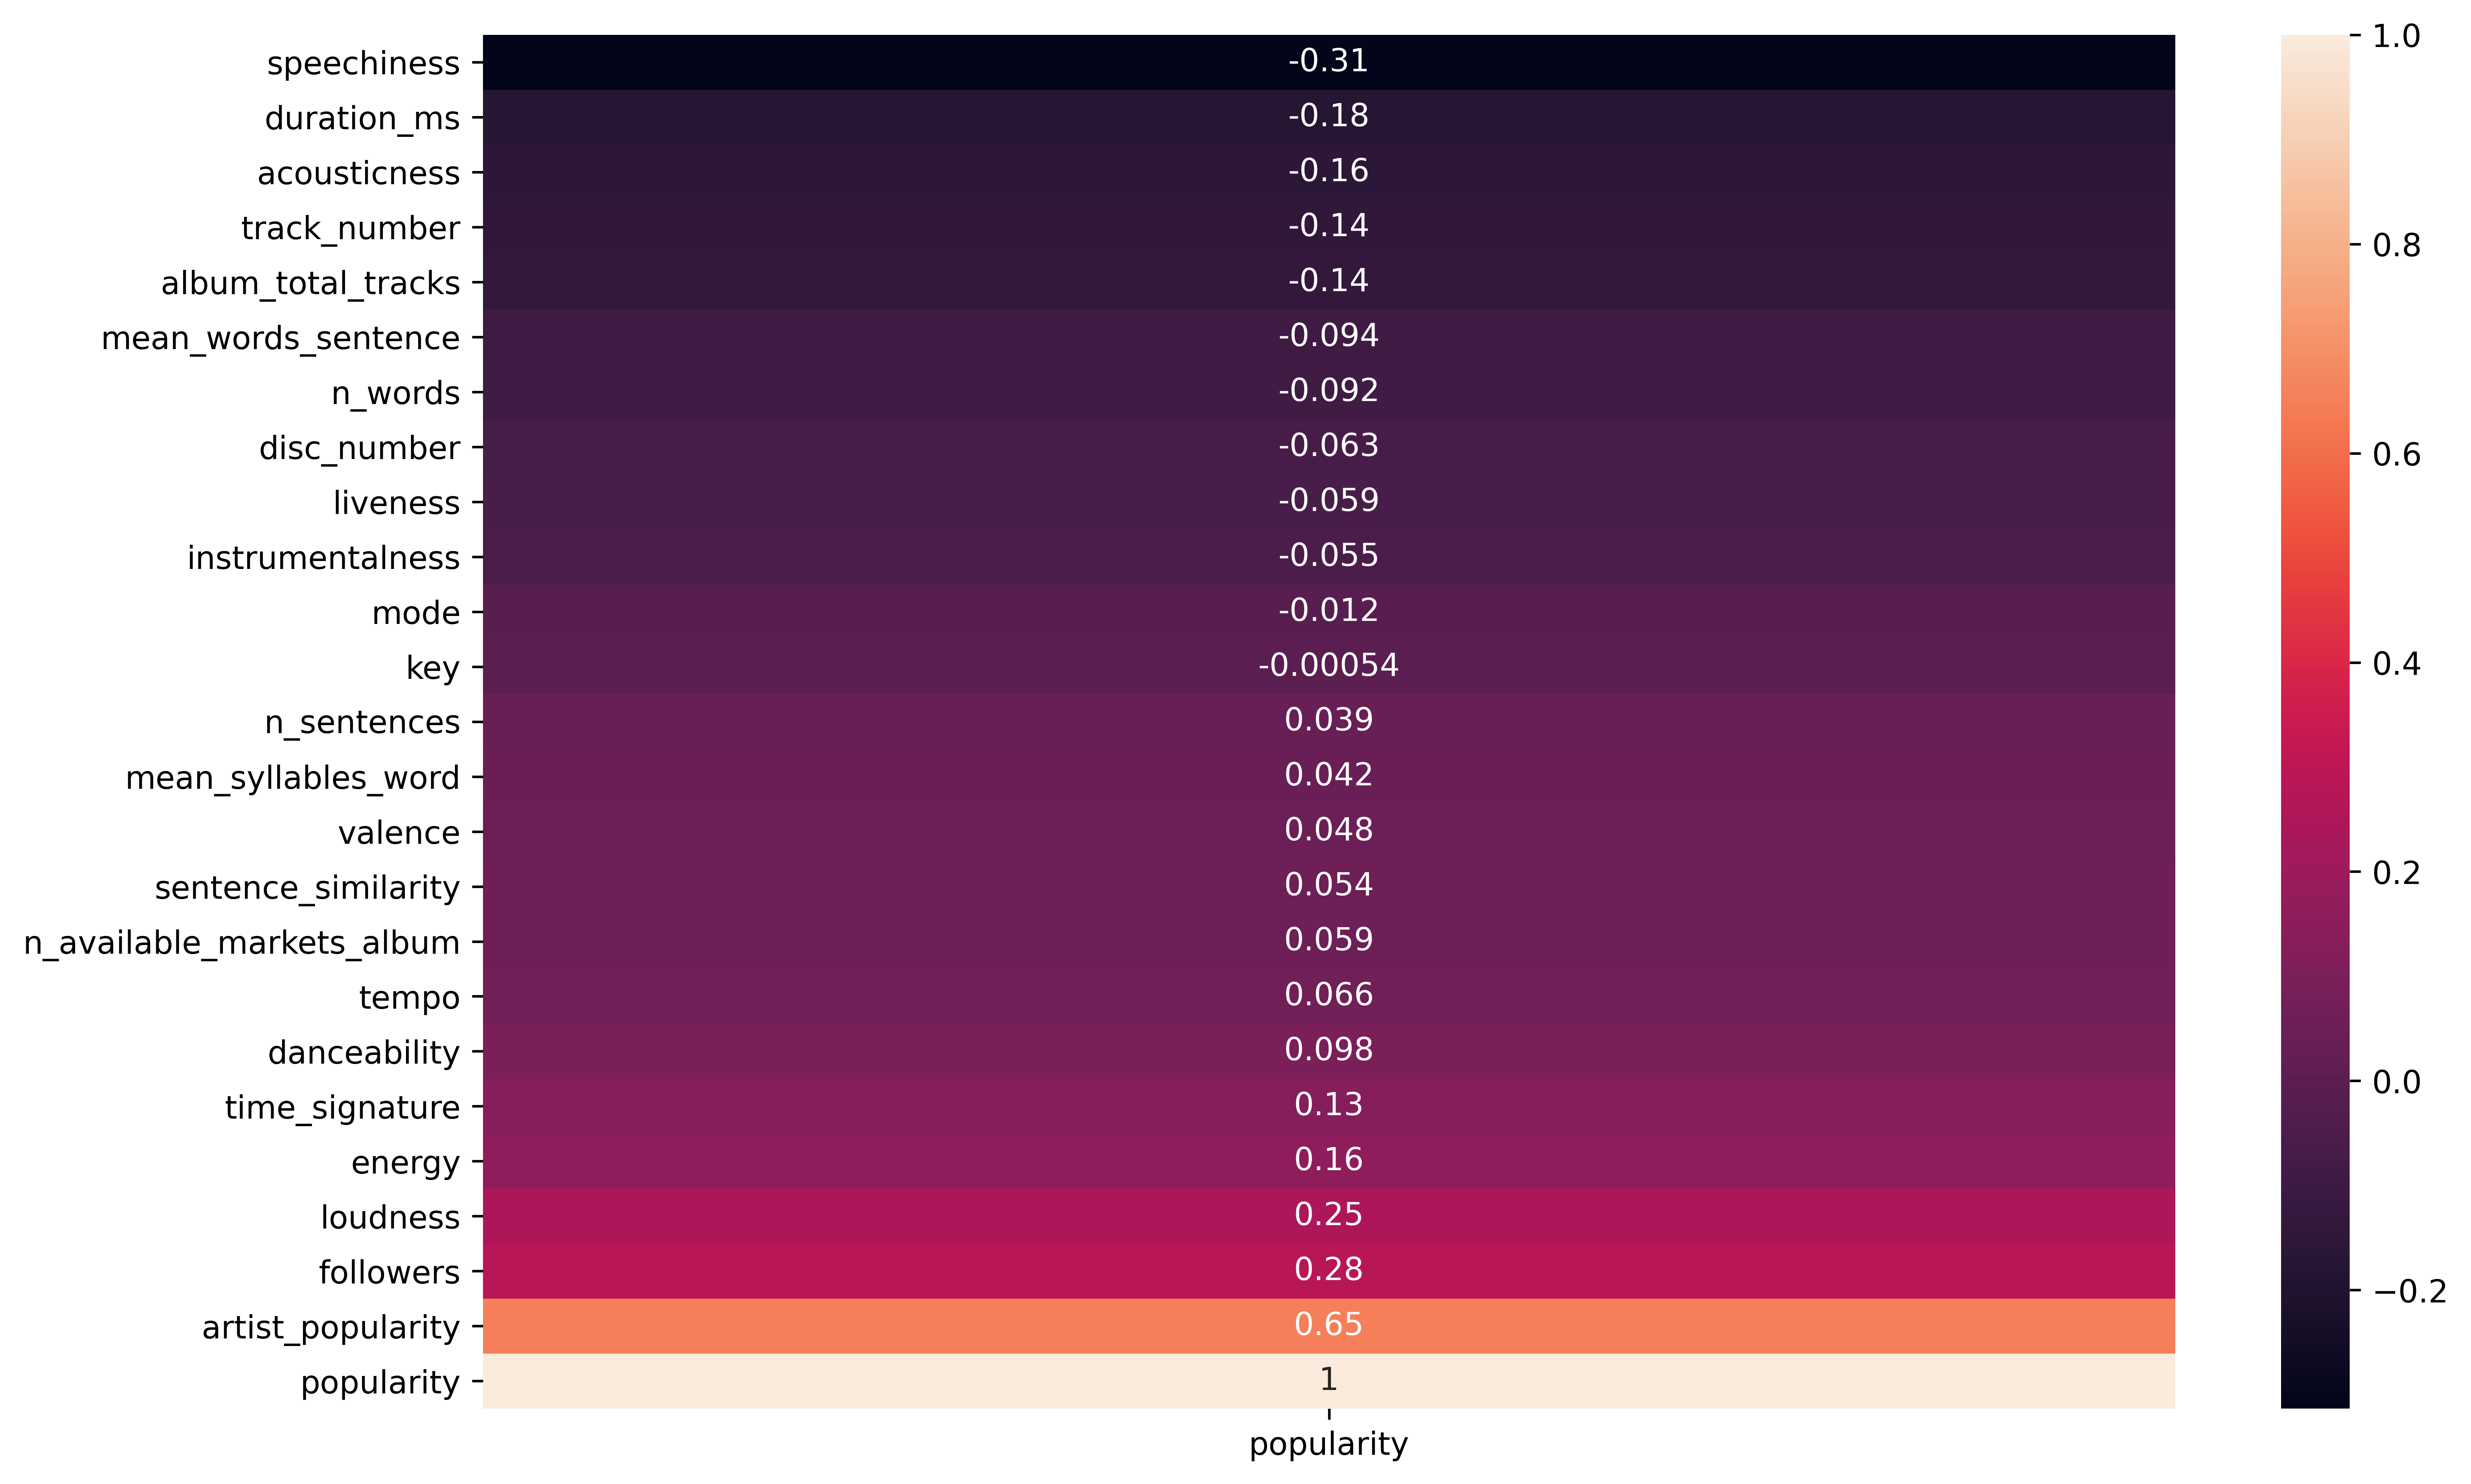

In [53]:
corr = final_df.corr()
popularity_corr = corr[["popularity"]]
popularity_corr = popularity_corr.sort_values(by=["popularity"])

fig, ax = plt.subplots(figsize=(12, 8), dpi=600)
sns.heatmap(popularity_corr, annot=True)

In [55]:
# Model Approach 1

# Selecting only top 15 highly correlated features with popularity
corr = final_df.corr().abs()
popularity_corr = corr[["popularity"]]
popularity_corr = popularity_corr.sort_values(by=["popularity"], ascending=False)
top_15_features = popularity_corr.iloc[1:16].index.values.tolist()

X = final_df.loc[:, top_15_features]
y = final_df[["popularity"]]

In [60]:
# Linear Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print("MAE: %.4f"
      % mean_absolute_error(y_test, y_pred_test))
print("MSE: %.4f"
      % mean_squared_error(y_test, y_pred_test))
print("R^2: %.4f"
      % r2_score(y_test, y_pred_test))

MAE: 9.3321
MSE: 143.6500
R^2: 0.5030


In [61]:
# Linear Regression Model w/ K-Fold

cv = KFold(n_splits=10)
scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "r2"]
scores = cross_validate(model, X, y, scoring=scoring, cv=cv)
print("MAE: %.4f" %-np.mean(scores["test_neg_mean_absolute_error"]))
print("MSE: %.4f" %-np.mean(scores["test_neg_mean_squared_error"]))
print("R^2: %.4f" %np.mean(scores["test_r2"]))

MAE: 9.6811
MSE: 162.0446
R^2: 0.4365


In [64]:
# Random Forest

random_forest = RandomForestRegressor()
scores_rf = cross_validate(random_forest, X, y, scoring=scoring, cv=5)

print("MAE: %.4f" %-np.mean(scores_rf["test_neg_mean_absolute_error"]))
print("MSE: %.4f" %-np.mean(scores_rf["test_neg_mean_squared_error"]))
print("R^2: %.4f" %np.mean(scores_rf["test_r2"]))

C:\Users\Luis\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luis\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luis\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Luis\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionW

MAE: 9.1435
MSE: 159.5096
R^2: 0.4670


In [88]:
# Model Approach 2

selected_features_with_popularity = ["acousticness", "artist_popularity", "duration_ms", "energy", 
                     "entropy_energy", "followers", "loudness", "speechiness", "popularity"]

selected_features_with_popularity_alt = ["artist_popularity", "entropy_energy", "followers", 
                                         "loudness", "speechiness", "popularity"]

selected_features_no_popularity = ["acousticness", "artist_popularity", "duration_ms", "energy", 
                     "entropy_energy", "followers", "loudness", "speechiness"]

selected_features_no_popularity_alt = ["artist_popularity", "entropy_energy", "followers", 
                                         "loudness", "speechiness"]

splittingDF = finalDF[selected_features_with_popularity]
print(f"Before drop NaN: {splittingDF.shape}")
splittingDF.dropna(inplace=True)
print(f"After drop NaN: {splittingDF.shape}")
train, test = train_test_split(splittingDF)

Before drop NaN: (101939, 9)
After drop NaN: (74960, 9)


C:\Users\Luis\AppData\Local\Temp/ipykernel_16668/710100591.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splittingDF.dropna(inplace=True)


In [92]:
X_train = train[selected_features_no_popularity][:20000]
X_test = test[selected_features_no_popularity][:4000]
y_train = train["popularity"][:20000]
y_test = test["popularity"][:4000]

def train_test_model(X_train, X_test, y_train, y_test, model="Linear Regression"):
    if model == "Linear Regression":
        clf = LinearRegression()
        clf.fit(X_train, y_train)
    elif model == "Decision Tree Regression": 
        parameters = {'max_depth':[3, 5, 8, 10, 13, 15]}
        
        dtr = DecisionTreeRegressor()
        clf = GridSearchCV(dtr, parameters, scoring = "r2")
        clf.fit(X_train, y_train)
    elif model == "Random Forest Regression":
        parameters = {'max_depth':[3, 5, 8, 10, 13, 15]}
        
        rfr = RandomForestRegressor()
        clf = GridSearchCV(rfr, parameters, scoring = "r2")
        clf.fit(X_train, y_train)
        
    y_pred = clf.predict(X_test)
    
    print(f"MAE for {model}: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE for {model}: {mean_squared_error(y_test, y_pred)}")
    print(f"Rˆ2 for {model}: {r2_score(y_test, y_pred)}")
    
    return clf

In [93]:
train_test_model(X_train, X_test, y_train, y_test)

MAE for Linear Regression: 8.780736105859763
MSE for Linear Regression: 127.98188640222423
Rˆ2 for Linear Regression: 0.4898993446911466


LinearRegression()

In [98]:
model_dtr = train_test_model(X_train, X_test, y_train, y_test, "Decision Tree Regression")

MAE for Decision Tree Regression: 8.344128400963564
MSE for Decision Tree Regression: 115.1313342783679
Rˆ2 for Decision Tree Regression: 0.5411181166887578


In [99]:
model_dtr.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [102]:
model_rfr = train_test_model(X_train, X_test, y_train, y_test, "Random Forest Regression")

MAE for Random Forest Regression: 7.969606133690755
MSE for Random Forest Regression: 106.80411645883906
Rˆ2 for Random Forest Regression: 0.5743081202591958


In [103]:
model_rfr.best_estimator_

RandomForestRegressor(max_depth=10)

In [104]:
y_pred_train_dtr = model_dtr.best_estimator_.predict(X_train)

print(f"MAE for Decision Tree Regression on training set: {mean_absolute_error(y_train, y_pred_train_dtr)}")
print(f"MSE for Decision Tree Regression on training set: {mean_squared_error(y_train, y_pred_train_dtr)}")
print(f"Rˆ2 for Decision Tree Regression on training set: {r2_score(y_train, y_pred_train_dtr)}")

MAE for Decision Tree Regression on training set: 8.303211494438717
MSE for Decision Tree Regression on training set: 114.16006689723574
Rˆ2 for Decision Tree Regression on training set: 0.5332709437152938


In [105]:
y_pred_train_rfr = model_rfr.best_estimator_.predict(X_train)

print(f"MAE for Random Forest Regression on training set: {mean_absolute_error(y_train, y_pred_train_rfr)}")
print(f"MSE for Random Forest Regression on training set: {mean_squared_error(y_train, y_pred_train_rfr)}")
print(f"Rˆ2 for Random Forest Regression on training set: {r2_score(y_train, y_pred_train_rfr)}")

MAE for Random Forest Regression on training set: 7.069760468947401
MSE for Random Forest Regression on training set: 83.020224822753
Rˆ2 for Random Forest Regression on training set: 0.6605822663107963


### Outro

There are some questions on:

* Merging methods
* Feature Correlation and relationship between tables (i.e. low_level_audio_features and tracks features)